## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [27]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

Loading ITables v2.5.2 from the internet... (need help?)


Loading ITables v2.5.2 from the internet... (need help?)


Loading ITables v2.5.2 from the internet... (need help?)


**Q1** Are each of these data sets Tidy?

**Q2** Do they all contain the same number of observations?

**Q3** What are the five variables?

**Q4** What variable do they have in common - what can we join **on**

**(Click Here)**



## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [3]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='left')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='left')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
2,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
3,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
4,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
5,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
6,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0
7,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
8,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
9,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN


**Q5** What, if anything, would change if you switched to how='right'?

**(Click Here)**

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [4]:
# Your code here



## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [5]:
# Your code here



## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [6]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
show(DF_prices)

Loading ITables v2.5.2 from the internet... (need help?)


Loading ITables v2.5.2 from the internet... (need help?)


## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [7]:
#

In [8]:
#

In [9]:
#

In [10]:
#

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [11]:
# Your code here


The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [12]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [13]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [14]:
#

In [15]:
#

In [16]:
#

**(Click Here to Explain your Results)**

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [28]:
#
DF_raw.keys()

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [30]:
new_DF = DF_raw[['Major','Unemployment_rate']]
new_DF.sort_values(by='Unemployment_rate').head(10)
#tail(10)

,Major,Unemployment_rate
52,MATHEMATICS AND COMPUTER SCIENCE,0.000000
112,SOIL SCIENCE,0.000000
83,BOTANY,0.000000
73,MILITARY TECHNOLOGIES,0.000000
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,0.000000
14,ENGINEERING MECHANICS PHYSICS AND SCIENCE,0.006334
19,COURT REPORTING,0.011690
119,MATHEMATICS TEACHER EDUCATION,0.016203
0,PETROLEUM ENGINEERING,0.018381
64,GENERAL AGRICULTURE,0.019642


In [35]:
coll = ['ShareWomen', 'Major']
DF_raw[coll].sort_values('ShareWomen').head(10)

,ShareWomen,Major
73,0.000000,MILITARY TECHNOLOGIES
66,0.077453,MECHANICAL ENGINEERING RELATED TECHNOLOGIES
26,0.090713,CONSTRUCTION SERVICES
1,0.101852,MINING AND MINERAL ENGINEERING
3,0.107313,NAVAL ARCHITECTURE AND MARINE ENGINEERING
8,0.119559,MECHANICAL ENGINEERING
0,0.120564,PETROLEUM ENGINEERING
106,0.124950,TRANSPORTATION SCIENCES AND TECHNOLOGIES
111,0.125035,FORESTRY
11,0.139793,AEROSPACE ENGINEERING


In [37]:
#SAME AS ABOVE BUT USUING MATH (ALSO CREATES NEW COLLUMN)

collu = ['Major', 'Total', 'Women']
DF_percent = DF_raw.copy()

DF_percent['Women_Participation'] = (DF_percent['Women'] / DF_percent['Total'])
DF_percent[['Major','Women_Participation']].sort_values(by='Women_Participation', ascending=True)

,Major,Women_Participation
73,MILITARY TECHNOLOGIES,0.000000
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,0.077453
26,CONSTRUCTION SERVICES,0.090713
1,MINING AND MINERAL ENGINEERING,0.101852
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.107313
...,...,...
138,ELEMENTARY EDUCATION,0.923745
51,MEDICAL ASSISTING SERVICES,0.927807
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,0.967998
164,EARLY CHILDHOOD EDUCATION,0.968954


In [40]:
#How do the distributions of median income compare across major categories?
#First get a value count on what major categories are in the data. What categories are most or least represented?
DF_raw['Major_category'].value_counts()

Major_category
Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: count, dtype: int64

In [45]:
DF_raw.keys()

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [50]:
#Do some summary statistics using the .group_by() command to see the statistics for each major category.
DF_raw.groupby('Major_category')[['Unemployment_rate','Low_wage_jobs','College_jobs']].describe()


Unemployment_rate                      \
                                                count      mean       std   
Major_category                                                              
Agriculture & Natural Resources                  10.0  0.056328  0.030809   
Arts                                              8.0  0.090173  0.010891   
Biology & Life Science                           14.0  0.060918  0.023370   
Business                                         13.0  0.071064  0.015875   
Communications & Journalism                       4.0  0.075538  0.010041   
Computers & Mathematics                          11.0  0.084256  0.040658   
Education                                        16.0  0.051702  0.027324   
Engineering                                      29.0  0.063334  0.034998   
Health                                           12.0  0.065920  0.022429   
Humanities & Liberal Arts                        15.0  0.081008  0.018147   
Industrial Arts & Consumer Services               7.0  0.048071  0.025297   
Interdisciplinary                                 1.0  0.070861       NaN   
Law & Public Policy                               5.0  0.090805  0.056606   
Physical Sciences                                10.0  0.046511  0.019903   
Psychology & Social Work                          9.0  0.072065  0.037400   
Social Science                                    9.0  0.095729  0.011507   

                                                                             \
                                          min       25%       50%       75%   
Major_category                                                                
Agriculture & Natural Resources      0.000000  0.046599  0.055315  0.074592   
Arts                                 0.075960  0.082525  0.089464  0.098148   
Biology & Life Science               0.000000  0.049980  0.067969  0.077748   
Business                             0.047859  0.060686  0.069749  0.072861   
Communications & Journalism          0.067961  0.068873  0.072177  0.078842   
Computers & Mathematics              0.000000  0.061957  0.090823  0.106853   
Education                            0.000000  0.039738  0.048785  0.057823   
Engineering                          0.006334  0.042876  0.059824  0.075038   
Health                               0.036983  0.046904  0.064261  0.081584   
Humanities & Liberal Arts            0.047179  0.066007  0.081742  0.095859   
Industrial Arts & Consumer Services  0.000000  0.040473  0.055677  0.063576   
Interdisciplinary                    0.070861  0.070861  0.070861  0.070861   
Law & Public Policy                  0.011690  0.071965  0.082452  0.128426   
Physical Sciences                    0.021167  0.027119  0.051098  0.056698   
Psychology & Social Work             0.029650  0.051908  0.065112  0.083811   
Social Science                       0.073080  0.092306  0.097244  0.101175   

                                              Low_wage_jobs                \
                                          max         count          mean   
Major_category                                                              
Agriculture & Natural Resources      0.096931          10.0    789.900000   
Arts                                 0.105772           8.0   7514.500000   
Biology & Life Science               0.085532          14.0   3053.000000   
Business                             0.096448          13.0   9752.923077   
Communications & Journalism          0.089837           4.0  12398.750000   
Computers & Mathematics              0.151850          11.0   1466.909091   
Education                            0.107579          16.0   2554.375000   
Engineering                          0.177226          29.0    864.793103   
Health                               0.112144          12.0   2605.833333   
Humanities & Liberal Arts            0.107116          15.0   6282.666667   
Industrial Arts & Consumer Services  0.072725           7.0   3798.57

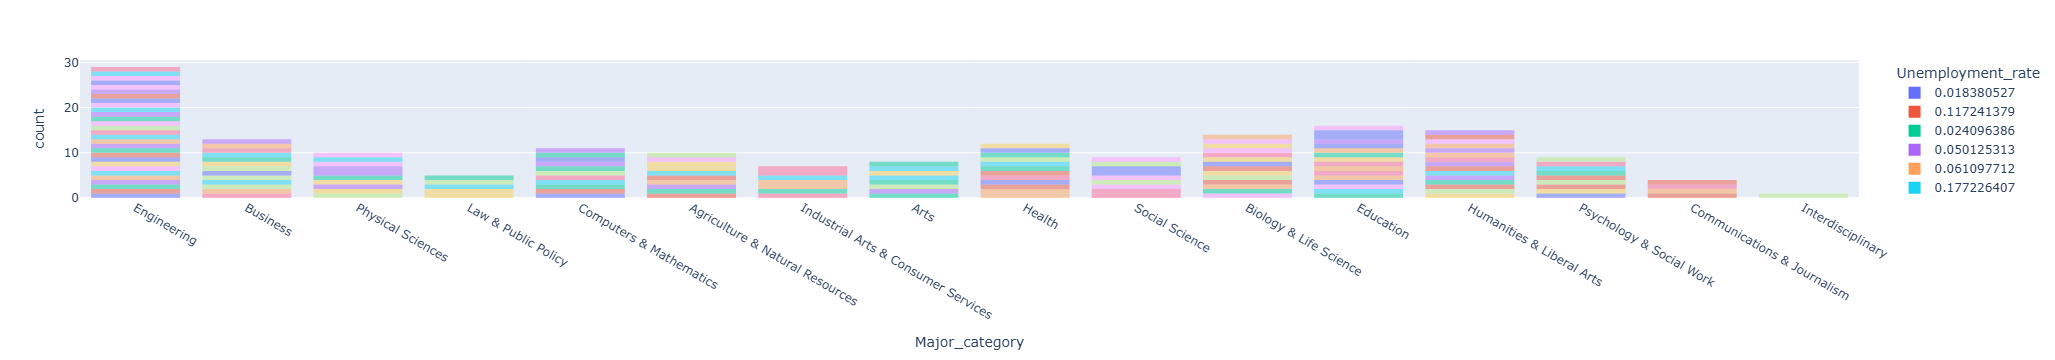

In [57]:
#Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
fig = px.histogram(DF_raw,
                   nbins=9,
                   x='Major_category',
                   color='Unemployment_rate',
                   opacity=0.5,
                  )


fig.show()
#Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
#Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

**(Click Here to Explain your Results)**

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [20]:
#mask needs to include the 4 majors

mask = (DF_raw['Major_category']=='Biology & Life Science') | (DF_raw['Major_category']=='Computers & Mathematics') | (DF_raw['Major_category']=='Engineering') | (DF_raw['Major_category']=='Physical Sciences')
DF_stem = DF_raw[mask]
DF_stem

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,5002,ATMOSPHERIC SCIENCES AND METEOROLOGY,4043.0,2744.0,1299.0,Physical Sciences,0.321296,32,3431,...,1309,2161,78,0.022229,35000,28000,50000,1808,1317,237
122,123,3699,MISCELLANEOUS BIOLOGY,10706.0,4747.0,5959.0,Biology & Life Science,0.556604,63,7767,...,2568,4542,483,0.058545,33500,23000,48000,4253,2722,459
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
132,133,3604,ECOLOGY,9154.0,3878.0,5276.0,Biology & Life Science,0.576360,86,7585,...,2741,3912,437,0.054475,33000,23000,42000,2856,4159,976


In [21]:
#median for total, stem, individual stem
mall = DF_raw['Median'].median()
print(mall)
mstem = DF_stem['Median'].median()
print(mstem)

36000.0
45000.0


In [22]:
#["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]
mstem = DF_stem['Median'].median()
print(mstem)

major_cat = 'Biology & Life Science'
mask = DF_stem['Major_category'] == major_cat
cat_median = DF_stem[mask]['Median'].median()
print(cat_median)

45000.0
36300.0


In [23]:
DF_raw.keys()

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [24]:
mcol = ['Major', 'Major_category', 'ShareWomen']

DF_raw[mcol].sort_values(by = 'ShareWomen', ascending = False).head(25)

fig = px.scatter(DF_raw, x='Median', y='ShareWomen')


**(Click Here to Explain your Results)**

***The median is overall higher but not all stem is created equal. bio + stem is 36300.0, which is slightly higher than the median for all which is 36000.0.***

### 4. Ask a question of interest to you.

In [25]:
#

**(Click Here to Explain your Results)**